## House_Sales_in_King_Count_USA

## **Import the required libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [6]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
filename = "Housing.csv"
response = requests.get(URL)
with open(filename,"wb") as f:
    f.write(response.content)

In [7]:
df = pd.read_csv(filename)

In [8]:
df1=df

In [12]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### **Function to retrive the data types of  attributes**

In [17]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# **Data Wrangling**

In [ ]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [313]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Finding the Missing value

In [47]:
missing_data = df.isnull()
missing_data.head(7)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(1))
    print("")      
    

date
date
False    1.0
Name: proportion, dtype: float64

price
price
False    1.0
Name: proportion, dtype: float64

bedrooms
bedrooms
False    0.999399
True     0.000601
Name: proportion, dtype: float64

bathrooms
bathrooms
False    0.999537
True     0.000463
Name: proportion, dtype: float64

sqft_living
sqft_living
False    1.0
Name: proportion, dtype: float64

sqft_lot
sqft_lot
False    1.0
Name: proportion, dtype: float64

floors
floors
False    1.0
Name: proportion, dtype: float64

waterfront
waterfront
False    1.0
Name: proportion, dtype: float64

view
view
False    1.0
Name: proportion, dtype: float64

condition
condition
False    1.0
Name: proportion, dtype: float64

grade
grade
False    1.0
Name: proportion, dtype: float64

sqft_above
sqft_above
False    1.0
Name: proportion, dtype: float64

sqft_basement
sqft_basement
False    1.0
Name: proportion, dtype: float64

yr_built
yr_built
False    1.0
Name: proportion, dtype: float64

yr_renovated
yr_renovated
False    1.0
Name: pro

In [260]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 0


#### We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace()

In [264]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace = True)

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_41764\3496928851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace = True)


#### We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace()

In [125]:
mean1=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean1, inplace=True)

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_41764\2290548393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean1, inplace=True)


In [127]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Exploratory Data Analysis

#### Find the count of number of houses with unique floor values and convert it to a data frame.

In [140]:
count = df['floors'].value_counts()
data_frame=count.to_frame(name = 'Count')
data_frame

,Count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#### Using the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 

[Text(0, 0, 'Without'), Text(1, 0, 'With')]

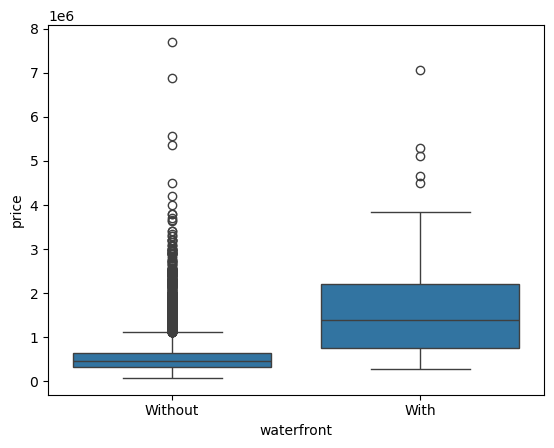

In [151]:
boxplot=sns.boxplot(data = df, x=df['waterfront'],y=df['price'])
new_labels = ['Without','With']
boxplot.set_xticklabels(new_labels)

#### Using the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

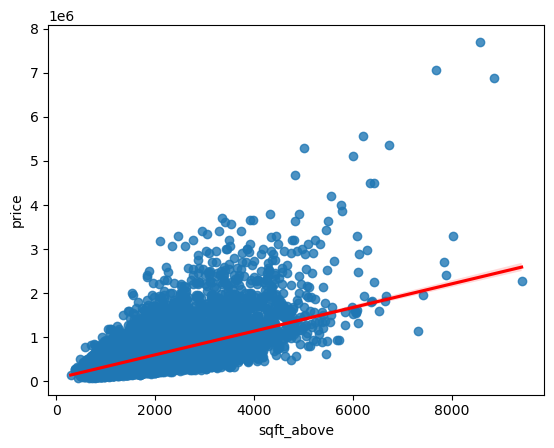

In [163]:
sns.regplot(data = df, x=df['sqft_above'], y= df['price'],line_kws={'color':'Red'})

In [177]:
corr = df.select_dtypes(include = 'number').corr()
corr

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bathrooms,0.525738,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.686309,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


# Model Development

In [219]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

#### Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [226]:
X1=df[['sqft_living']]
lm.fit(X1,Y)
print(lm.score(X1,Y))
print(lm.predict(X1))

0.4928532179037931
[287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]


#### Fit a linear regression model to predict the 'price' using the list of features

In [315]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]     
lm.fit(features,Y)
print("R^2",lm.score(features,Y))
print("Predict",lm.predict(features))

R^2 0.6576951666037496
Predict [283270.39007444 662572.30128727 306267.58455112 ... 304248.55129896
 428758.80343227 304046.65336946]


In [230]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [268]:
pipe=Pipeline(Input)
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 
pipe.fit(features,Y)
ypipe=pipe.predict(features)
print(r2_score(Y,ypipe))

0.7513408009657256


# Model Evaluation and Refinement

In [280]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#### Split the data set into test and training sets

In [277]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


#### Creating Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [285]:
reg=Ridge(alpha=0.1)
reg.fit(x_train,y_train)
yhat=reg.predict(x_test)
print(r2_score(y_test,yhat))

0.647875916393911


#### Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [294]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
reg.fit(x_train_pr,y_train)
yhat=reg.predict(x_test_pr)
print(r2_score(y_test,yhat))

0.7002744243096839
